In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load data

In [2]:
data = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\data.csv")
labels = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\labels.csv")

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_8056\923119767.py:1: SyntaxWarning: invalid escape sequence '\.'
  data = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\data.csv")
C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_8056\923119767.py:2: SyntaxWarning: invalid escape sequence '\.'
  labels = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\labels.csv")


## Pre-Processing

In [3]:
data = data.rename(columns={"Unnamed: 0": "sample_id"})
labels = labels.rename(columns={"Unnamed: 0": "sample_id"})
genes = data.filter(regex="gene_")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(genes)

## See variance across original features

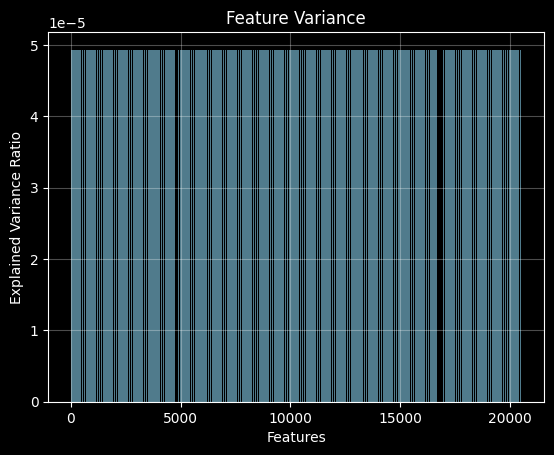

In [4]:
# Calculate variances of original features (columns)
feature_variances = np.var(scaled_data, axis=0)  # Variance per feature
total_variance = np.sum(feature_variances)  # Total variance in data
explained_variance_ratio = feature_variances / total_variance # Variance ratio for each feature

# Sort features by variance (descending)
sorted_indices = np.argsort(explained_variance_ratio)[::-1]
sorted_variance_ratio = explained_variance_ratio[sorted_indices]
sorted_labels = np.array([i for i in range(data.shape[1])])[sorted_indices]

# Bar plot for individual explained variance
bars = plt.bar(sorted_labels, sorted_variance_ratio, alpha=0.6, color='skyblue', label='Individual Variance')
# Labels and title
plt.xlabel('Features')
plt.ylabel('Explained Variance Ratio')
plt.title('Feature Variance')
plt.grid(True, alpha=0.3)

plt.show()

In [5]:
from statistics import median
print(f"min value: {min(explained_variance_ratio)},\nmax vaue: {max(explained_variance_ratio)},\n median: {median(explained_variance_ratio)}")
print("-"*40)
print("Variance is evenly distributed across all features, with no single feature dominating the variance of the dataset.\nThis suggests that all features contribute similarly to the overall variance in the dataset.")

min value: 0.0,
max vaue: 4.934859849980267e-05,
 median: 4.9348598499802604e-05
----------------------------------------
Variance is evenly distributed across all features, with no single feature dominating the variance of the dataset.
This suggests that all features contribute similarly to the overall variance in the dataset.


## PCA implementation and visualization

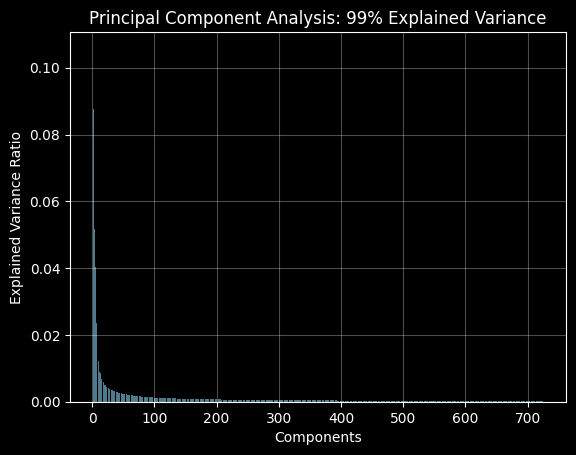

In [7]:
# Initialize PCA (specify components or retain variance)
pca = PCA(n_components=0.99)  # Keep 99% of variance
principal_components = pca.fit_transform(scaled_data)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
components = range(1, len(explained_variance) + 1)

# Bar plot for individual explained variance
bars = plt.bar(components, explained_variance, alpha=0.6, color='skyblue', label='Individual Variance')

# Labels and title
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis: 99% Explained Variance')
plt.grid(True, alpha=0.3)

plt.show()

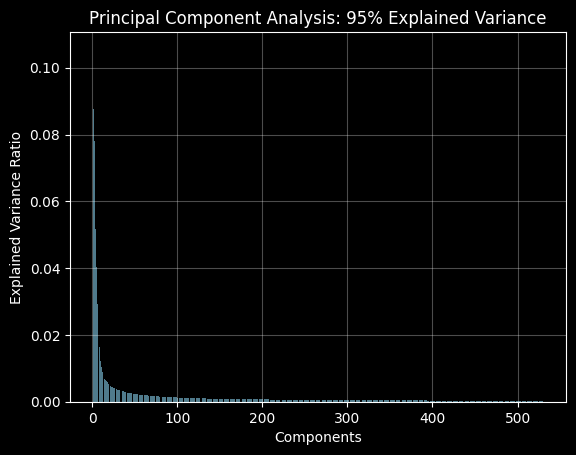

In [8]:
# Initialize PCA (specify components or retain variance)
pca = PCA(n_components=0.95)  # Keep 95% of variance
principal_components = pca.fit_transform(scaled_data)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
components = range(1, len(explained_variance) + 1)

# Bar plot for individual explained variance
bars = plt.bar(components, explained_variance, alpha=0.6, color='skyblue', label='Individual Variance')

# Labels and title
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis: 95% Explained Variance')
plt.grid(True, alpha=0.3)

plt.show()

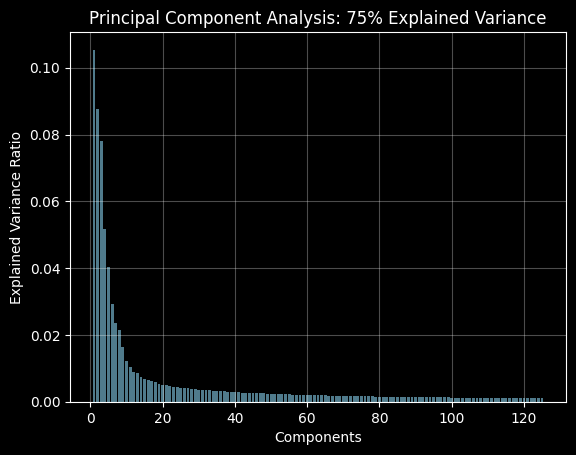

In [9]:
# Initialize PCA (specify components or retain variance)
pca = PCA(n_components=0.75)  # Keep 75% of variance
principal_components = pca.fit_transform(scaled_data)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
components = range(1, len(explained_variance) + 1)

# Bar plot for individual explained variance
bars = plt.bar(components, explained_variance, alpha=0.6, color='skyblue', label='Individual Variance')

# Labels and title
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis: 75% Explained Variance')
plt.grid(True, alpha=0.3)

plt.show()

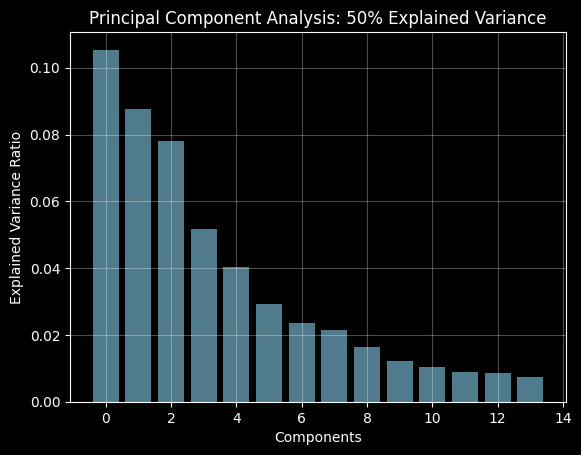

In [10]:
# Initialize PCA (specify components or retain variance)
pca = PCA(n_components=0.50)  # Keep 50% of variance
principal_components = pca.fit_transform(scaled_data)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
components = range(0, len(explained_variance))

# Bar plot for individual explained variance
bars = plt.bar(components, explained_variance, alpha=0.6, color='skyblue', label='Individual Variance')

# Labels and title
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis: 50% Explained Variance')
plt.grid(True, alpha=0.3)

plt.show()

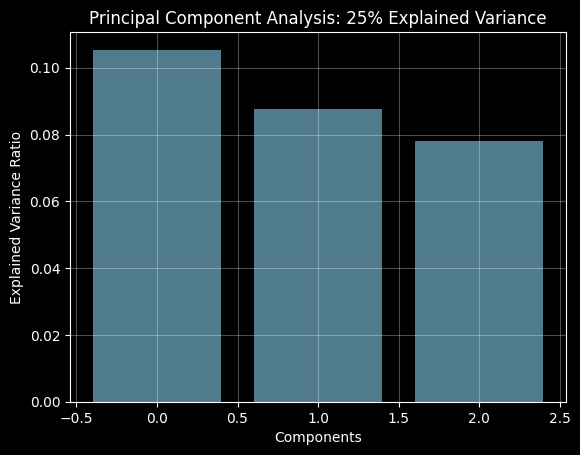

In [11]:
# Initialize PCA (specify components or retain variance)
pca = PCA(n_components=0.25)  # Keep 25% of variance
principal_components = pca.fit_transform(scaled_data)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
components = range(0, len(explained_variance))

# Bar plot for individual explained variance
bars = plt.bar(components, explained_variance, alpha=0.6, color='skyblue', label='Individual Variance')

# Labels and title
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis: 25% Explained Variance')
plt.grid(True, alpha=0.3)

plt.show()

In [21]:
"""
    After the PCA, we can reduce considerably the dimensionality of the dataset while retaining a significant amount of variance:
    * 20532 -> 531 components retain 95% of the variance.
    * 20532 -> 125 components retain 75% of the variance.
    * 20532 -> 14 components retain 50% of the variance.
    * 20532 -> 3 components retain 25% of the variance.

    The dimensionality reduction facilitates further analysis, by allowing the use of tools that require lower dimensional datasets
"""

'\n    After the PCA, we can reduce considerably the dimensionality of the dataset while retaining a significant amount of variance:\n    * 20532 -> 531 components retain 95% of the variance.\n    * 20532 -> 125 components retain 75% of the variance.\n    * 20532 -> 14 components retain 50% of the variance.\n    * 20532 -> 3 components retain 25% of the variance.\n\n    The dimensionality reduction facilitates further analysis, by allowing the use of tools that require lower dimensional datasets\n'

In [12]:
import sys
import os
project_root = os.path.dirname(os.getcwd())
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils.display_plots import plot

In [13]:
# Perform PCA to capture 99% of variance
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [14]:
print(f"the two principal components explain {sum(pca.explained_variance_ratio_)*100:.2f} of the variance in the dataset")

the two principal components explain 19.29 of the variance in the dataset


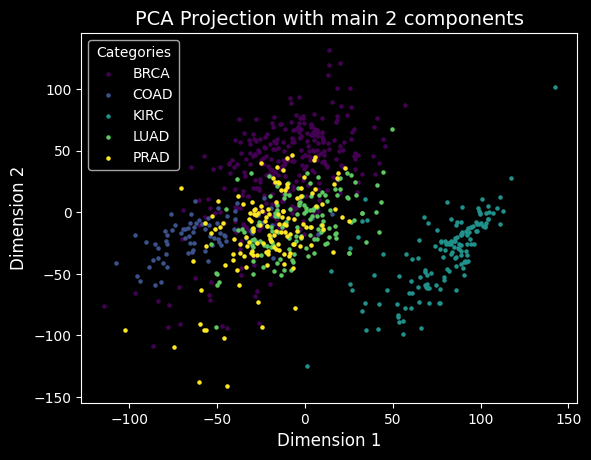

In [15]:
plot(principal_components, labels=labels["Class"], title='PCA Projection with main 2 components')